<a href="https://colab.research.google.com/github/harita-gr/ICTACK-AI-ML/blob/main/Intermediate_Assessment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Logistic Regression

Exploratory Data Analysis

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
data = pd.read_csv("/content/train_LZdllcl.csv")

In [116]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [117]:
data.shape

(54808, 14)

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [119]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

Data Pre-proprocessing

In [120]:
#Dropping unwanted attributes
data.drop(['region','gender','recruitment_channel'], axis=1, inplace = True)

In [121]:
# Encode categorical variables using label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode the 'department' column
data['department'] = label_encoder.fit_transform(data['department'])
# Encode the 'education' column
data['education'] = label_encoder.fit_transform(data['education'])

In [122]:
data.head()

,employee_id,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,2,1,35,5.0,8,1,0,49,0
1,65141,4,0,1,30,5.0,4,0,0,60,0
2,7513,7,0,1,34,3.0,7,0,0,50,0
3,2542,7,0,2,39,1.0,10,0,0,50,0
4,48945,8,0,1,45,3.0,2,0,0,73,0


In [123]:
data['department'].unique()

array([7, 4, 8, 0, 6, 5, 1, 2, 3])

In [124]:
data['education'].unique()

array([2, 0, 3, 1])

Missing Data Handling

1. Replacing missing value of "education" column with mode

In [89]:
data["education"].nunique()

3

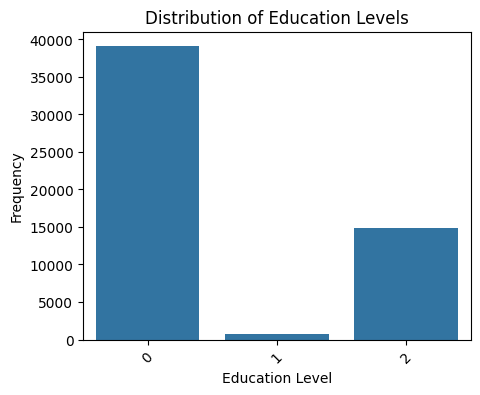

In [90]:
# Plot the distribution of education levels
plt.figure(figsize=(5, 4))
sns.countplot(data=data, x='education')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [91]:
# Calculate the mode of the 'education' column
education_mode = data['education'].mode()[0]

# Replace missing values with the mode
data['education'] = data['education'].fillna(education_mode)

In [130]:
data.isnull().sum()

employee_id                0
department                 0
education                  0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

2. Using predictive modeling techniques to impute missing values in the 'previous_year_rating' column


In [131]:
data["previous_year_rating"].nunique()

5

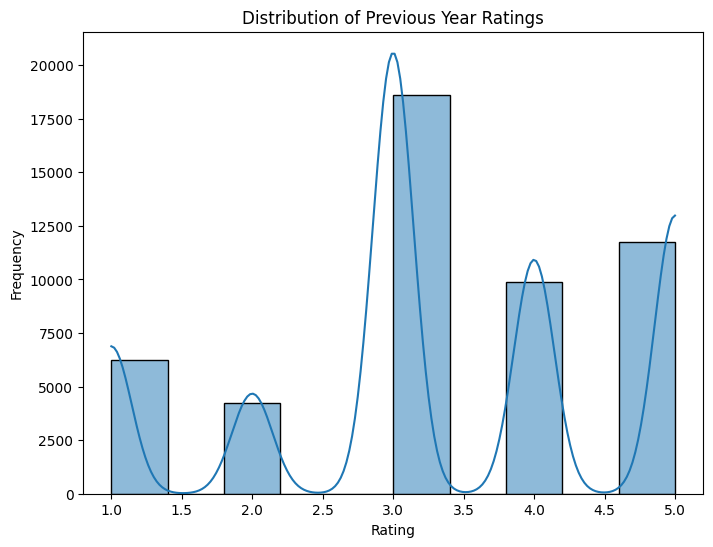

In [132]:
# Plot histogram of previous_year_rating
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='previous_year_rating', bins=10, kde=True)
plt.title('Distribution of Previous Year Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [134]:
# Create a copy of the DataFrame with missing values
data_impute = data.copy()

In [135]:
# Split the data into training and test sets
train_data = data_impute.dropna()  # Use rows without missing values for training
X_train = train_data.drop(columns=['previous_year_rating'])  # Features
y_train = train_data['previous_year_rating']  # Target variable

In [136]:
# Prepare data for imputation (rows with missing values)
X_impute = data_impute[data_impute['previous_year_rating'].isna()].drop(columns=['previous_year_rating'])

# Train a simple linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [137]:
# Predict missing values
predicted_ratings = linear_model.predict(X_impute)

# Update DataFrame with imputed values
data_impute.loc[data_impute['previous_year_rating'].isna(), 'previous_year_rating'] = predicted_ratings

In [138]:
data = data_impute
data.isnull().sum()

employee_id             0
department              0
education               0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

## Modelling

In [139]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [140]:
X = data.drop(['is_promoted'], axis=1)  # Features (all columns except 'is_promoted')
y = data['is_promoted']  # Target variable ('is_promoted' column)

In [141]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_promoted, dtype: int64

In [142]:
X.head()

,employee_id,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,65438,7,2,1,35,5.0,8,1,0,49
1,65141,4,0,1,30,5.0,4,0,0,60
2,7513,7,0,1,34,3.0,7,0,0,50
3,2542,7,0,2,39,1.0,10,0,0,50
4,48945,8,0,1,45,3.0,2,0,0,73


In [143]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [145]:
from sklearn.metrics import classification_report

# Make predictions on the validation set
y_pred = log_model.predict(X_val)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_val, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10054
           1       0.00      0.00      0.00       908

    accuracy                           0.92     10962
   macro avg       0.46      0.50      0.48     10962
weighted avg       0.84      0.92      0.88     10962



To predict the output for test file using the trained model

In [146]:
test_data = pd.read_csv('/content/test_2umaH9m.csv')

In [147]:
test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [148]:
test_data.shape

(23490, 13)

In [149]:
test_data.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

Pre-Processing Test Data

In [150]:
#Dropping unwanted attributes
test_data.drop(['region','gender','recruitment_channel'], axis=1, inplace = True)

# Encode the 'department' column
test_data['department'] = label_encoder.fit_transform(test_data['department'])
# Encode the 'education' column
test_data['education'] = label_encoder.fit_transform(test_data['education'])

In [151]:
test_data.head()

,employee_id,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,0,1,24,NaN,1,1,0,77
1,74430,2,0,1,31,3.0,5,0,0,51
2,72255,7,0,1,31,1.0,4,0,0,47
3,38562,5,0,3,31,2.0,9,0,0,65
4,64486,1,0,1,30,4.0,7,0,0,61


In [152]:
# Calculate the mode of the 'education' column
education_mode = test_data['education'].mode()[0]

# Replace missing values with the mode
test_data['education'] = test_data['education'].fillna(education_mode)

In [153]:
# Create a copy of the DataFrame with missing values
data_impute = test_data.copy()

# Split the data into training and test sets
train_data = data_impute.dropna()  # Use rows without missing values for training
X_train = train_data.drop(columns=['previous_year_rating'])  # Features
y_train = train_data['previous_year_rating']  # Target variable

# Prepare data for imputation (rows with missing values)
X_impute = data_impute[data_impute['previous_year_rating'].isna()].drop(columns=['previous_year_rating'])

# Train a simple linear regression model
linear_model_2 = LinearRegression()
linear_model_2.fit(X_train, y_train)

# Predict missing values
predicted_ratings = linear_model_2.predict(X_impute)

# Update DataFrame with imputed values
data_impute.loc[data_impute['previous_year_rating'].isna(), 'previous_year_rating'] = predicted_ratings

test_data = data_impute
test_data.isnull().sum()

employee_id             0
department              0
education               0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

Use the trained model to make predictions on the preprocessed test data


In [155]:
X_test = test_data
predictions = log_model.predict(X_test)

# Create a DataFrame with employee_id and corresponding predictions
predictions_data = pd.DataFrame({'employee_id': test_data['employee_id'], 'is_promoted': predictions})
predictions_data.to_csv('/content/predictions.csv', index=False)